### Step1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Step2. Creating & Reading the data

In [4]:
train_data= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Credit_risk_SVM\risk_analytics_train.csv",index_col=0)
test_data= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Credit_risk_SVM\risk_analytics_test.csv",index_col=0)

In [6]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Step3. Check if there are missing values. If yes, handle them.

In [8]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Step4. Data Exploration 

In [10]:
colname1=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

In [11]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
train_data["LoanAmount"].fillna(round(train_data[x].mean(),0),inplace=True)
test_data["LoanAmount"].fillna(round(test_data[x].mean(),0),inplace=True)

In [13]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [14]:
train_data.fillna(value=0,inplace=True)
test_data.fillna(value=0,inplace=True)

In [15]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [16]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
colname= ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

le=LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [19]:
train_data.head()
#converted Loan status as Y-->1 and N-->0

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,342.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [20]:
colname= ["Gender","Married","Education","Self_Employed","Property_Area"]

le=LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [21]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


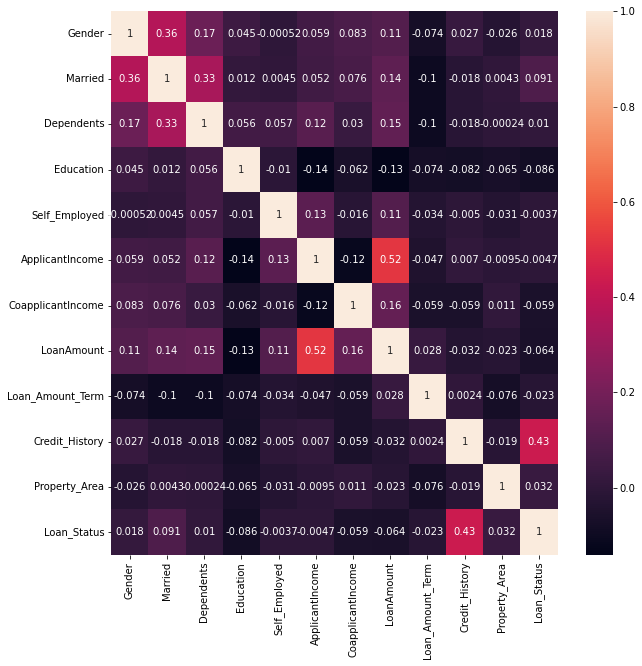

In [25]:
plt.figure(figsize=(10,10))
corr_df=train_data.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

### Step5. Creating X & Y

In [26]:
X_train=train_data.values[:,:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [27]:
X_test=test_data.values[:,:]

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(614, 11)
(367, 11)
(614,)


# Scaling the data

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

X_test= scaler.fit_transform(X_test)

In [30]:
print(X_train)
print(X_test)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]]
[[ 0.48547939  0.75835829 -0.75822199 ...  0.26602207  0.56161569
   1.11876379]
 [ 0.48547939  0.75835829  0.18187082 ...  0.26602207  0.56161569
   1.11876379]
 [ 0.48547939  0.75835829  1.12196363 ...  0.26602207  0.56161569
   1.11876379]
 ...
 [ 0.48547939 -1.31863792 -0.75822199 ...  0.26602207 -1.78057703
  -0.09598861]
 [ 0.48547939  0.75835829 -0.75822199 ...  0.26602207  0.56161569
  -1.31074101]
 [ 0.48547939 -1.31863792 -0.75822199 ... -2.52163936  0.56161569
  -1.31074101]]


# Training the model

In [100]:
from sklearn.svm import SVC
svc_model=SVC(kernel="rbf",C=1,gamma=0.1)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [49]:
svc_model.score(X_train,Y_train)

#score
#Y_pred=svs_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)

0.7980456026058632

# Evaluation

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Y_pred_new=svc_model.predict(X_train)
cfm = confusion_matrix(Y_train,Y_pred_new)
print(cfm)

print("classification report")

print(classification_report(Y_train,Y_pred_new))

acc = accuracy_score(Y_train,Y_pred_new)
print("Accuracy of the model:",acc)

[[105  87]
 [ 37 385]]
classification report
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       192
           1       0.82      0.91      0.86       422

    accuracy                           0.80       614
   macro avg       0.78      0.73      0.75       614
weighted avg       0.79      0.80      0.79       614

Accuracy of the model: 0.7980456026058632


In [51]:
test_data=pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Credit_risk_SVM\risk_analytics_test.csv",header=0)
test_data["Y_predictions"]=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [53]:
test_data["Y_predictions"]=test_data["Y_predictions"].replace({1:"Eligible",0:"Not Eligible"})
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predictions
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Not Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


In [54]:
test_data.to_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Credit_risk_SVM\test_data_output.csv",index=False)

In [56]:
test_data.Y_predictions.value_counts()

Eligible        287
Not Eligible     80
Name: Y_predictions, dtype: int64

#Changing C value

In [57]:
from sklearn.svm import SVC
svc_model=SVC(kernel="rbf",C=80,gamma=0.1)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 

In [60]:
svc_model.score(X_train,Y_train)

#score
#Y_pred=svs_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)

0.9218241042345277

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Y_pred_new=svc_model.predict(X_train)
cfm = confusion_matrix(Y_train,Y_pred_new)
print(cfm)

print("classification report")

print(classification_report(Y_train,Y_pred_new))

acc = accuracy_score(Y_train,Y_pred_new)
print("Accuracy of the model:",acc)

[[152  40]
 [  8 414]]
classification report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       192
           1       0.91      0.98      0.95       422

    accuracy                           0.92       614
   macro avg       0.93      0.89      0.90       614
weighted avg       0.92      0.92      0.92       614

Accuracy of the model: 0.9218241042345277


# Cross-Validation

In [91]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) #76.05%
#classifier=KNeighborsClassifier(n_neighbors=25, metric='euclidean') #73.11%
#classifier=svm.SVC(kernel='sigmoid',C=8,gamma=0.01) #77.03%
#classifier=svm.SVC(kernel='rbf',C=80,gamma=0.1) #69.69%
#classifier=LogisticRegression() #77.03%
#classifier=svm.SVC(kernel='linear',C=10,gamma=0.01) #77.03%
#classifier=svm.SVC(kernel='rbf',C=20,gamma=0.01)

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.79674797 0.73170732 0.7398374  0.77235772 0.81147541]
0.7704251632680261


# GridSearch-CrossValidation

In [81]:
from sklearn import svm

svc_model = svm.SVC(kernel="rbf")

parameter_space = {
    #'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    #"C": np.arange(0,101,5)
    'C': [1,5,8,10,20,30, 40,50,130]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)

In [82]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20, 30, 40, 50, 130],
                         'gamma': [0.1, 0.01, 0.001]})

In [83]:
print("Best parameters found:\n",clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.01}


In [84]:
clf.best_score_ #accuracy of the best params using the 5-fold cv

0.7704118352658936

In [86]:
clf.score(X_train,Y_train) #accuracy of the best params on the train data

0.7768729641693811

In [92]:
Y_pred = clf.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [101]:
Y_pred.sum()

287

In [95]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [96]:
import pickle

In [102]:
# save the model to disk
filename = r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Credit_risk_SVM\svc_model.sav"
pickle.dump(svc_model,open(filename,"wb"))

In [103]:
#load the model from disk
loaded_model = pickle.load(open(filename, "rb"))
Y_pred = loaded_model.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,